<a href="https://colab.research.google.com/github/bhartisaurav/deepLearningWorkshop/blob/master/dpL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf



In [34]:
!git clone https://github.com/bhartisaurav/deepLearningWorkshop.git

fatal: destination path 'deepLearningWorkshop' already exists and is not an empty directory.


In [0]:
b=tf.placeholder(tf.float32)
c=tf.Variable(3.0)
const=tf.constant(2.0)


In [0]:
d=tf.add(b,c)
e=tf.add(c,const)
a=tf.multiply(d,e)

In [0]:
init=tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
  sess.run(init)
  a_out=sess.run(a,feed_dict={b:50})
  print("varaible={}".format(a_out))

varaible=265.0


#TENSOR BORAD FOR GRAPH

In [39]:
!pip install tensorboardcolab

In [0]:
from tensorboardcolab import TensorBoardColab

In [41]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://c80e7fed.ngrok.io


In [0]:
a=tf.constant(2,name="a")
b=tf.constant(2,name="b")
x=tf.add(a,b)
summary_writer=tbc.get_writer()

In [43]:
with tf.Session() as sess:
  x_out=sess.run(x)
  print(x_out)
  summary_writer.add_graph(sess.graph)

4


#Linear Regression


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng=np.random

In [0]:
#parameter
learning_rate=0.01
training_epochs=1000
display_step=50

In [0]:
#training data
train_x=np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.187])
train_y=np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.336,2.996])

#n_sample


In [0]:
#tf Graph Input
X=tf.placeholder("float")
Y=tf.placeholder("float")

#set model weight
W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

In [0]:
#contruct a linear model
pred=tf.add(tf.multiply(X,W),b)

#Mean squared error
#cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2)

#Gradient descent
#Note, minimize() knows to modify W and b because Variable object and trainable=True by default
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize the variable (i.e assign their default)
init=tf.global_variables_initializer()


In [0]:
sess=tf.Session()
sess.run(init)

Epoch: 0050 cost= 2.173426151 W= 0.49018112 b= -0.54112357
Epoch: 0050 cost= 2.776131630 W= 0.5405315 b= -0.5296803
Epoch: 0050 cost= 2.446234941 W= 0.52110314 b= -0.5332127
Epoch: 0050 cost= 2.693283081 W= 0.5363087 b= -0.5309466
Epoch: 0050 cost= 2.465851307 W= 0.4329358 b= -0.54586333
Epoch: 0050 cost= 2.302855015 W= 0.44603944 b= -0.5427195
Epoch: 0050 cost= 3.122267246 W= 0.39879707 b= -0.5475505
Epoch: 0050 cost= 2.162833929 W= 0.46538112 b= -0.5367886
Epoch: 0100 cost= 1.696547270 W= 0.4225195 b= -0.08033891
Epoch: 0100 cost= 2.211783886 W= 0.46569464 b= -0.070526384
Epoch: 0100 cost= 1.873558760 W= 0.44365096 b= -0.07453433
Epoch: 0100 cost= 2.160001755 W= 0.46295136 b= -0.07165796
Epoch: 0100 cost= 1.961262226 W= 0.36297953 b= -0.08608391
Epoch: 0100 cost= 1.880705953 W= 0.36907253 b= -0.08462206
Epoch: 0100 cost= 2.152709723 W= 0.35063535 b= -0.08650745
Epoch: 0100 cost= 1.654519796 W= 0.4071305 b= -0.07737618
Epoch: 0150 cost= 1.476946235 W= 0.37897643 b= 0.21619537
Epoch: 0

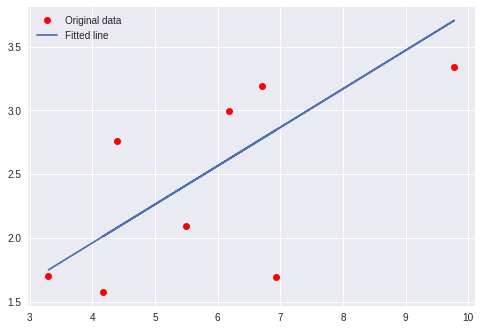

In [70]:
for epoch in range(training_epochs):
  for (x, y) in zip(train_x, train_y):
    sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
      c = sess.run(cost, feed_dict={X: train_x, Y:train_y})
      print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
              "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")

# Print the cost, weight and bias after the model training
training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
# Graphic display
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.plot(train_x, sess.run(W) * train_x + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [0]:
#@title Enter new value
x = 3.5 #@param {type:"number"}

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorboardcolab import TensorBoardColab,TensorBoardColabCallback


In [74]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

<function matplotlib.pyplot.show>

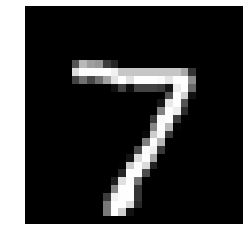

<Figure size 576x864 with 0 Axes>

In [76]:
images=mnist.test.images[0:9]
plt.imshow(images[0].reshape(28,28),cmap="gray")
plt.axis('off')
plt.figure(figsize=(8,12))
plt.show